In [31]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import re
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords

import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from tqdm.auto import tqdm

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ghckd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ghckd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ghckd\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [32]:
train = pd.read_csv(
    filepath_or_buffer="../data/train.csv", 
    )

def text_cleaner(text:str):
    if text is not np.nan:
        text = text.lower()
        text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)
        stop = stopwords.words("english")
        text = " ".join([word for word in text.split() if word not in (stop)])
    return text

for col in ["keyword", "location", "text"]:
    train[col] = train[col].apply(text_cleaner)    
    
train["keyword"] = train["keyword"].fillna("no keyword")
train["location"] = train["location"].fillna("no location")
train["text"] = train["text"].fillna("no text")

In [33]:
# ## Stemming and Lemmatization
# stemmer = PorterStemmer()
# stemmer.stem(single_text)

# lemmatizer = WordNetLemmatizer()
# lemmatizer.lemmatize(single_text)



## Word Cloud

In [34]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

#### 1. keyword

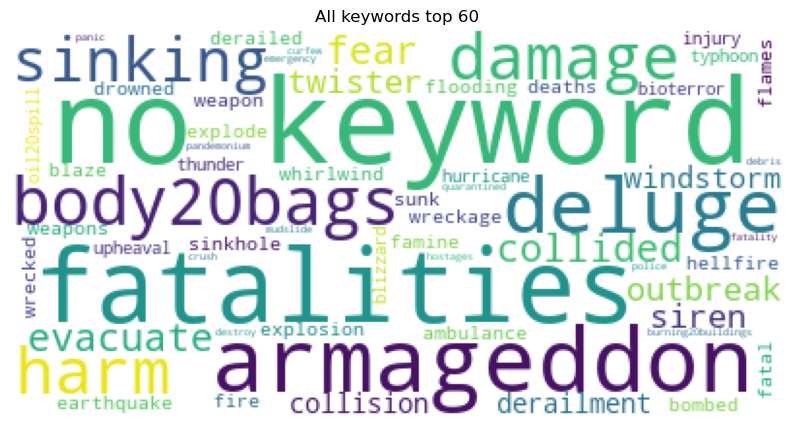

In [35]:
word_list = []
for word in train["keyword"]:
    word_list.append(word)
counts = Counter(word_list)
most_counts = counts.most_common(60) 

wc = WordCloud(background_color="white", max_font_size=60)
cloud = wc.generate_from_frequencies(dict(most_counts))
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.title("All keywords top 60")
plt.show()

In [36]:
# train["keyword"].value_counts()[:60]

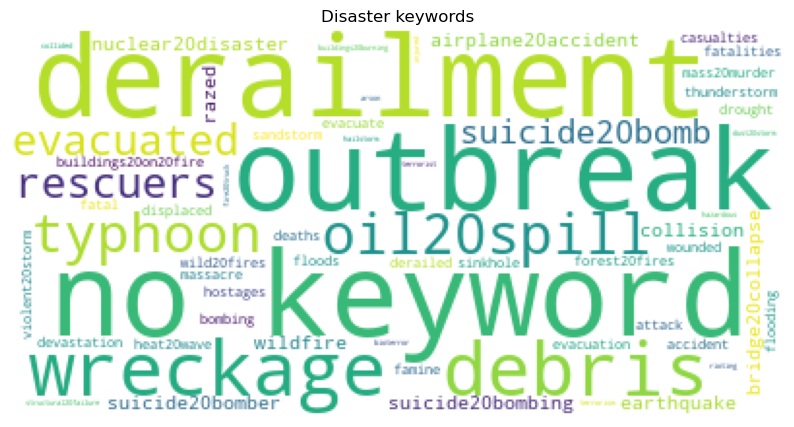

In [37]:
disaster_word_list = []
for word in train[train["target"] == 1]["keyword"]:
    disaster_word_list.append(word)
counts = Counter(disaster_word_list)
most_counts = counts.most_common(60) 

wc = WordCloud(background_color="white", max_font_size=60)
cloud = wc.generate_from_frequencies(dict(most_counts))
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.title("Disaster keywords")
plt.show()

In [38]:
# train[train["target"] == 1]["keyword"].value_counts()[:60]

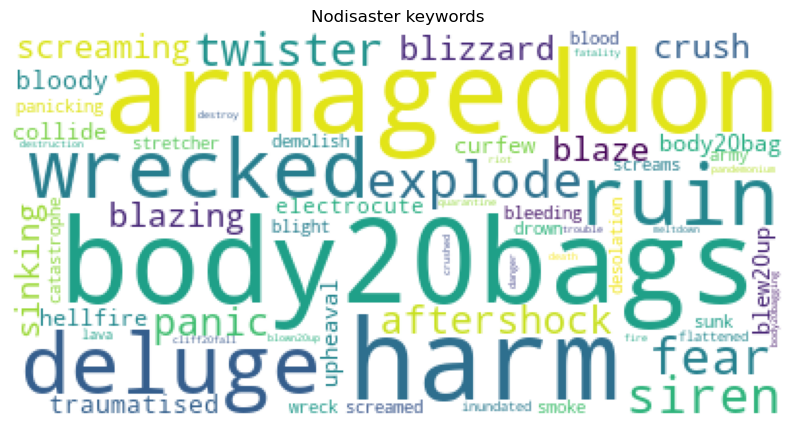

In [39]:
nodisaster_word_list = []
for word in train[train["target"] == 0]["keyword"]:
    nodisaster_word_list.append(word)
counts = Counter(nodisaster_word_list)
most_counts = counts.most_common(60) 

wc = WordCloud(background_color="white", max_font_size=60)
cloud = wc.generate_from_frequencies(dict(most_counts))
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.title("Nodisaster keywords")
plt.show()

In [40]:
# train[train["target"] == 0]["keyword"].value_counts()[:60]

#### 2. location

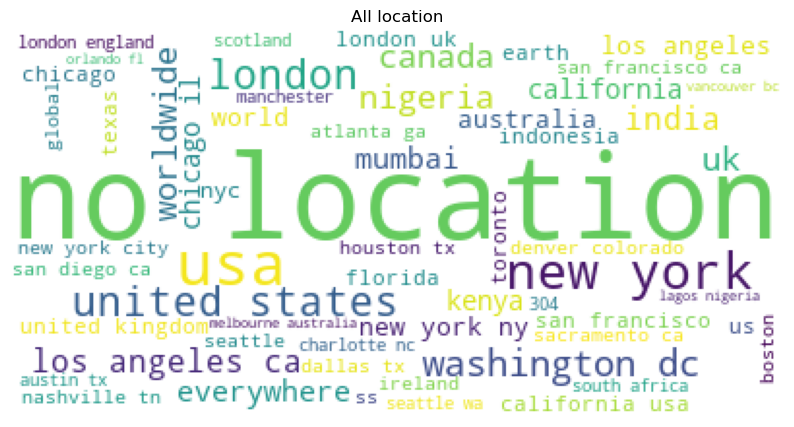

In [41]:
word_list = []
for word in train["location"]:
    word_list.append(word)
counts = Counter(word_list)
most_counts = counts.most_common(60) 

wc = WordCloud(background_color="white", max_font_size=60)
cloud = wc.generate_from_frequencies(dict(most_counts))
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.title("All location")
plt.show()

In [42]:
# train["location"].value_counts()[:60]

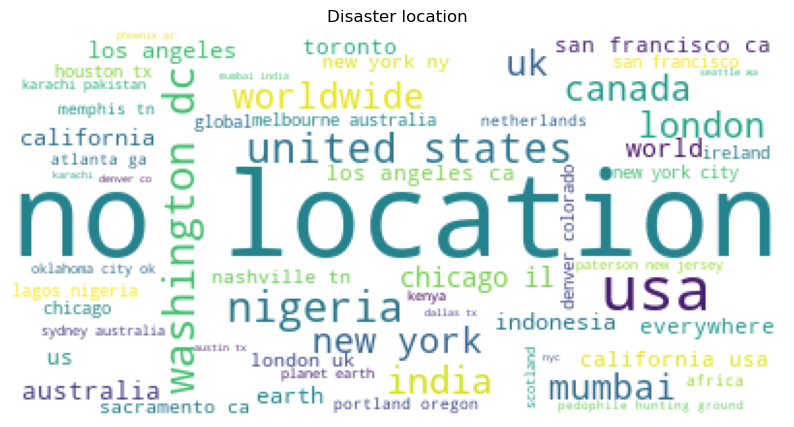

In [43]:
disaster_word_list = []
for word in train[train["target"] == 1]["location"]:
    disaster_word_list.append(word)
counts = Counter(disaster_word_list)
most_counts = counts.most_common(60) 

wc = WordCloud(background_color="white", max_font_size=60)
cloud = wc.generate_from_frequencies(dict(most_counts))
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.title("Disaster location")
plt.show()

In [44]:
# train[train["target"] == 1]["location"].value_counts()[:60]

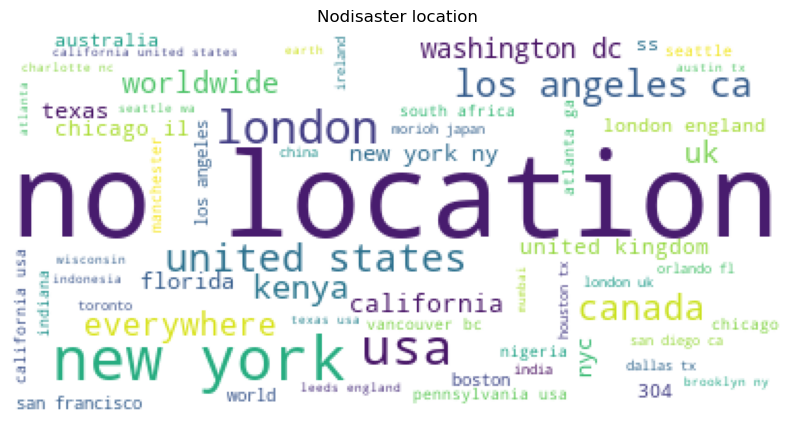

In [45]:
nodisaster_word_list = []
for word in train[train["target"] == 0]["location"]:
    nodisaster_word_list.append(word)
counts = Counter(nodisaster_word_list)
most_counts = counts.most_common(60) 

wc = WordCloud(background_color="white", max_font_size=60)
cloud = wc.generate_from_frequencies(dict(most_counts))
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.title("Nodisaster location")
plt.show()

In [46]:
# train[train["target"] == 0]["location"].value_counts()[:60]

#### 3. text

In [47]:
## tokenize
def tokenizer(text):
    tokens = nltk.word_tokenize(text)
    return tokens

In [48]:
train["text_tokenized"] = train["text"].apply(tokenizer)

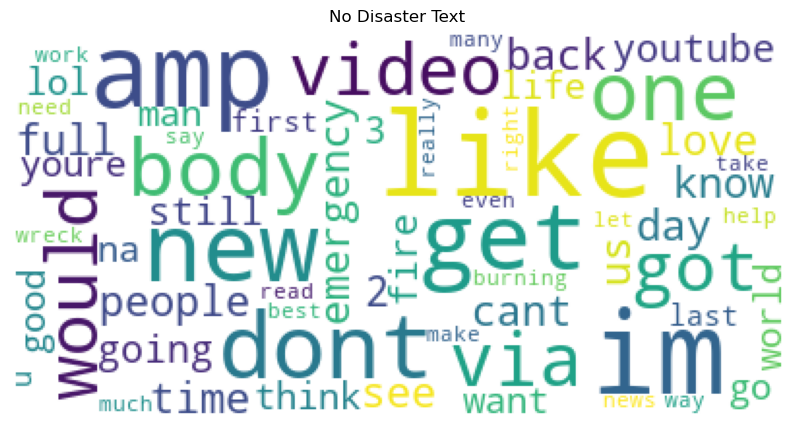

In [50]:
word_list = []
for word in train[train["target"] == 0]["text_tokenized"]:
    word_list += word

counts = Counter(word_list)
most_counts = counts.most_common(60) 

wc = WordCloud(background_color="white", max_font_size=60)
cloud = wc.generate_from_frequencies(dict(most_counts))
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.title("No Disaster Text")
plt.show()

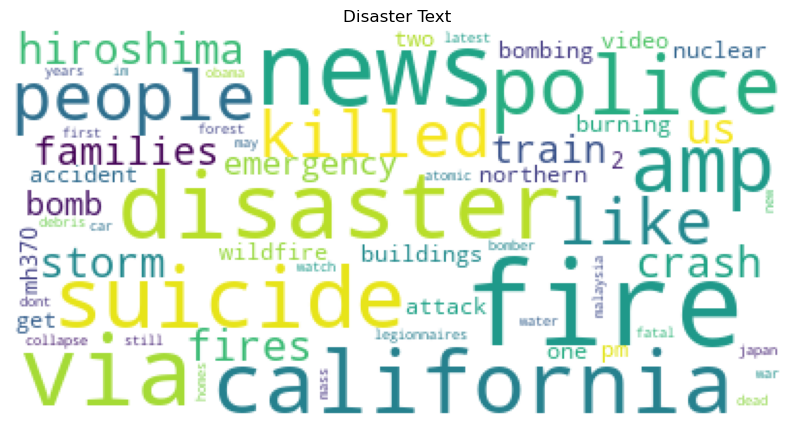

In [51]:
word_list = []
for word in train[train["target"] == 1]["text_tokenized"]:
    word_list += word

counts = Counter(word_list)
most_counts = counts.most_common(60) 

wc = WordCloud(background_color="white", max_font_size=60)
cloud = wc.generate_from_frequencies(dict(most_counts))
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.title("Disaster Text")
plt.show()